In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from statsmodels.stats import proportion
from statsmodels.stats.meta_analysis import effectsize_smd
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power

from math import asin
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm_notebook
from typing import Union
from distfit import distfit

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('gb_sem_9_hw.csv')

In [4]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
df.version.replace({'gate_30': 0, 'gate_40': 1}, inplace=True)
df.retention_1.replace({True: 1, False: 0}, inplace=True)
df.retention_7.replace({True: 1, False: 0}, inplace=True)

In [7]:
df.describe()

,userid,version,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,0.504374,51.872457,0.445210,0.186065
std,2.883286e+06,0.499984,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000,0.000000
25%,2.512230e+06,0.000000,5.000000,0.000000,0.000000
50%,4.995815e+06,1.000000,16.000000,0.000000,0.000000
75%,7.496452e+06,1.000000,51.000000,1.000000,0.000000
max,9.999861e+06,1.000000,49854.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   userid          90189 non-null  int64
 1   version         90189 non-null  int64
 2   sum_gamerounds  90189 non-null  int64
 3   retention_1     90189 non-null  int64
 4   retention_7     90189 non-null  int64
dtypes: int64(5)
memory usage: 3.4 MB


In [9]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,0,3,0,0
1,337,0,38,1,0
2,377,1,165,1,0
3,483,1,1,0,0
4,488,1,179,1,1


In [10]:
data = df.copy(deep=True)

In [11]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,0,3,0,0
1,337,0,38,1,0
2,377,1,165,1,0
3,483,1,1,0,0
4,488,1,179,1,1


In [12]:
data.userid.value_counts()

116        1
6632278    1
6658202    1
6658194    1
6658134    1
          ..
3347358    1
3347337    1
3346992    1
3346979    1
9999861    1
Name: userid, Length: 90189, dtype: int64

### Установим задачу:

Хотим проверить зависимости тестирования:
    
    группа - количетво раундов
    группа - возврат на 1 день
    группа - возврат на 7 день


In [13]:
control = data[data['version'] == 0].copy()
test = data[data['version'] == 1].copy()

In [14]:
control.shape, test.shape

((44700, 5), (45489, 5))

In [15]:
control.describe(), test.describe()

(             userid  version  sum_gamerounds   retention_1   retention_7
 count  4.470000e+04  44700.0    44700.000000  44700.000000  44700.000000
 mean   4.987564e+06      0.0       52.456264      0.448188      0.190201
 std    2.881026e+06      0.0      256.716423      0.497314      0.392464
 min    1.160000e+02      0.0        0.000000      0.000000      0.000000
 25%    2.505469e+06      0.0        5.000000      0.000000      0.000000
 50%    4.983631e+06      0.0       17.000000      0.000000      0.000000
 75%    7.481497e+06      0.0       50.000000      1.000000      0.000000
 max    9.999710e+06      0.0    49854.000000      1.000000      1.000000,
              userid  version  sum_gamerounds   retention_1   retention_7
 count  4.548900e+04  45489.0    45489.000000  45489.000000  45489.000000
 mean   5.009073e+06      1.0       51.298776      0.442283      0.182000
 std    2.885496e+06      0.0      103.294416      0.496663      0.385849
 min    3.770000e+02      1.0        

In [16]:
dfit = distfit()

result = dfit.fit_transform(test['sum_gamerounds'])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00669022] [loc=51.299 scale=103.293]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00290985] [loc=0.000 scale=51.299]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00027492] [loc=-19.632 scale=19.632]
[distfit] >INFO> [dweibull  ] [0.43 sec] [RSS: 0.0107812] [loc=4.000 scale=32.065]
[distfit] >INFO> [t         ] [1.31 sec] [RSS: 0.0027232] [loc=9.533 scale=10.425]
[distfit] >INFO> [genextreme] [1.69 sec] [RSS: 0.000342667] [loc=8.127 scale=12.149]
[distfit] >INFO> [gamma     ] [0.33 sec] [RSS: 0.00711806] [loc=-0.000 scale=3.949]
[distfit] >INFO> [lognorm   ] [0.26 sec] [RSS: 0.000141125] [loc=-0.262 scale=15.210]
[distfit] >INFO> [beta      ] [0.80 sec] [RSS: 0.000787604] [loc=-0.000 scale=19952.031]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00830253] [loc=0.000 scale=2640.000]
[distfit] >INFO> [loggamma  ] [0.22 sec] [RSS: 0.00677248] [loc=-33690.830 scale=4551.557]
[distfit]

In [17]:
result['model']

{'name': 'lognorm',
 'score': 0.00014112533231966308,
 'loc': -0.26168682590540004,
 'scale': 15.210018233618559,
 'arg': (1.7157500071954126,),
 'params': (1.7157500071954126, -0.26168682590540004, 15.210018233618559),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x2c2bae39c60>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 0.6429666418070866,
 'CII_max_alpha': 255.46568605642997}

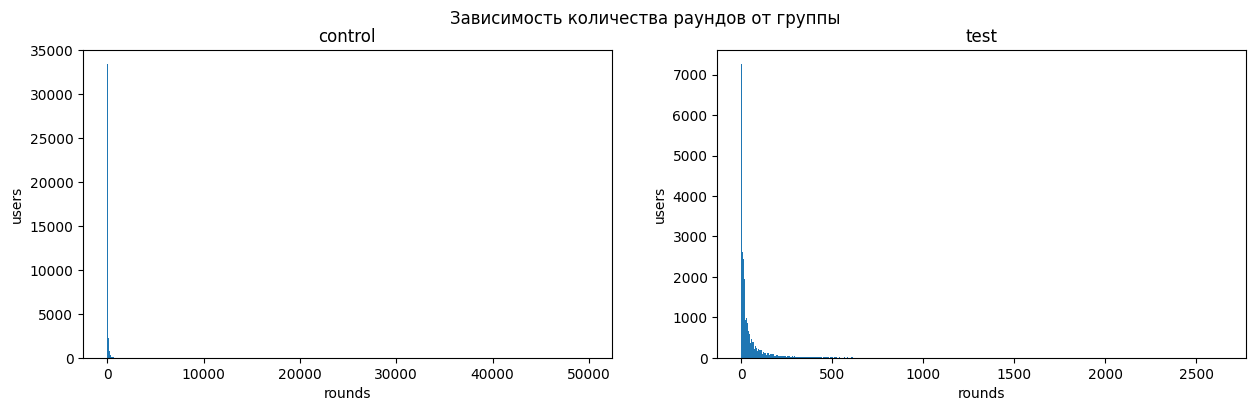

In [59]:
len=2

fig, axis = plt.subplots(1, len, figsize=(15, 4), sharey=False);

axis[0].hist(control['sum_gamerounds'], bins=1000);
axis[0].set_title('control')
axis[0].set_ylabel('users')
axis[0].set_xlabel('rounds')

axis[1].hist(test['sum_gamerounds'], bins=1000);
axis[1].set_title('test')
axis[1].set_ylabel('users')
axis[1].set_xlabel('rounds')

fig.suptitle('Зависимость количества раундов от группы');

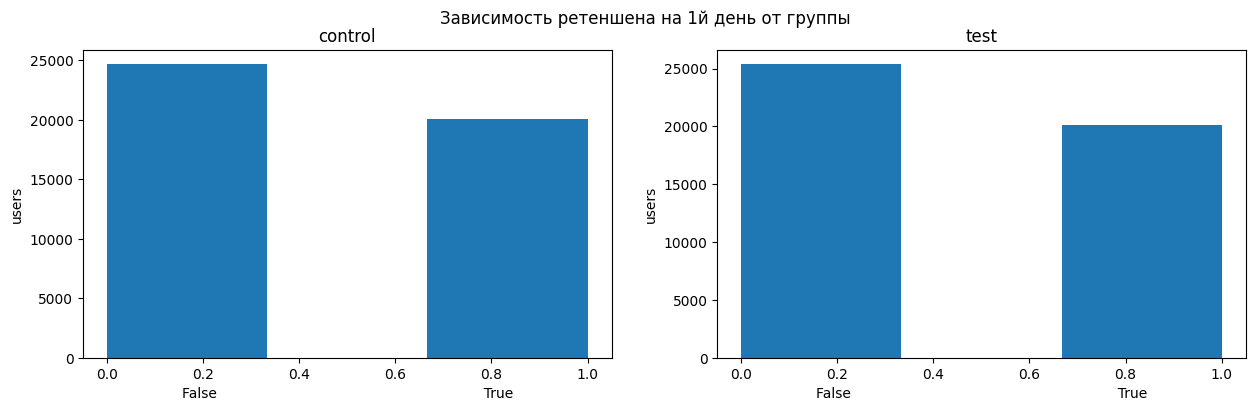

In [69]:
len=2

fig, axis = plt.subplots(1, len, figsize=(15, 4), sharey=False);

axis[0].hist(control['retention_1'], bins=3);
axis[0].set_title('control')
axis[0].set_ylabel('users')
axis[0].set_xlabel('False                                                             True')

axis[1].hist(test['retention_1'], bins=3);
axis[1].set_title('test')
axis[1].set_ylabel('users')
axis[1].set_xlabel('False                                                             True')

fig.suptitle('Зависимость ретеншена на 1й день от группы');

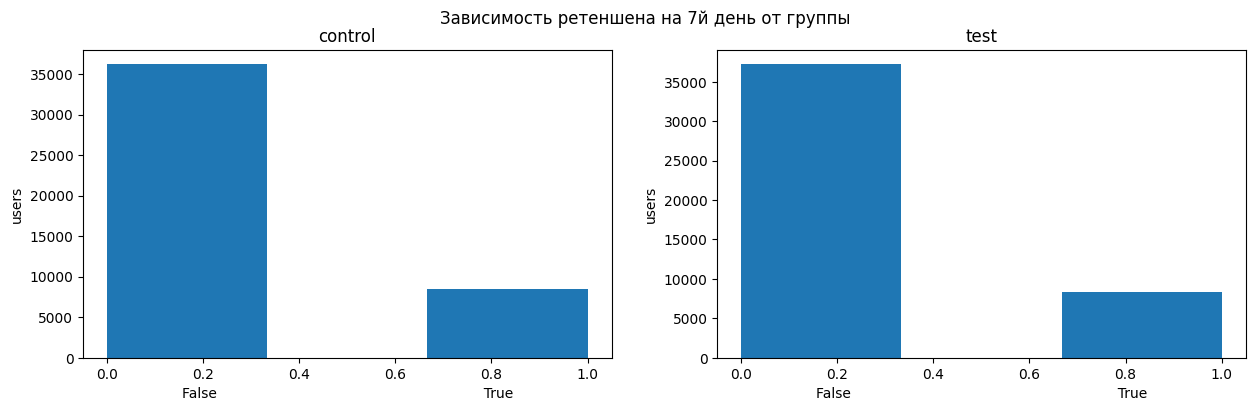

In [70]:
len=2

fig, axis = plt.subplots(1, len, figsize=(15, 4), sharey=False);

axis[0].hist(control['retention_7'], bins=3);
axis[0].set_title('control')
axis[0].set_ylabel('users')
axis[0].set_xlabel('False                                                             True')

axis[1].hist(test['retention_7'], bins=3);
axis[1].set_title('test')
axis[1].set_ylabel('users')
axis[1].set_xlabel('False                                                             True')

fig.suptitle('Зависимость ретеншена на 7й день от группы');

In [21]:
def calc_continuous_effect(control: pd.DataFrame,
                           treatment: pd.DataFrame,
                           column: str,
                           stat_test: Union['t', 'mw'] = 't') -> pd.DataFrame:
    
    control_mean = control.loc[:, column].mean()
    treatment_mean = treatment.loc[:, column].mean()
    
    control_std = control.loc[:, column].std(ddof=1)
    treatment_std = treatment.loc[:, column].std(ddof=1)
    
    nobs1 = control.shape[0]
    nobs2 = treatment.shape[0]
    
    # effect_size = (treatment_mean - control_mean) / ((control_std ** 2 + treatment_std ** 2) / 2) ** .5
    effect_size, _ = effectsize_smd(mean1=treatment_mean, sd1=treatment_std, nobs1=nobs2,
                                    mean2=control_mean, sd2=control_std, nobs2=nobs1)
    
    if stat_test == 't':
        _, pvalue = stats.ttest_ind(a=control.loc[:, column],
                                    b=treatment.loc[:, column],
                                    equal_var=False, # perform Welch's t-test
                                    alternative='two-sided')
   
    elif stat_test == 'mw':
        _, pvalue = stats.mannwhitneyu(x=control.loc[:, column],
                                       y=treatment.loc[:, column],
                                       alternative='two-sided')
    else:
        raise NotImplementedError()

    power = tt_ind_solve_power(effect_size=effect_size,
                               nobs1=control.shape[0],
                               alpha=0.05,
                               power=None,
                               ratio=nobs2/nobs1)
    
    pw_settings = {'alpha': .05, 'power': .8}
    pw_nobs = tt_ind_solve_power(effect_size=effect_size,
                                 nobs1=None,
                                 alpha=pw_settings['alpha'],
                                 power=pw_settings['power'],
                                 ratio=1)
    
    difference = treatment_mean - control_mean
    
    result = pd.DataFrame({'effect_size': effect_size,
                           'alpha': pvalue, 
                           'beta': (1-power),
                           'power': power,
                           'difference': difference,
                           'nobs': nobs1 + nobs2},
                          index=[column]) 
    
    perfect_way = pd.DataFrame({'effect_size': effect_size,
                                'alpha': pw_settings['alpha'],
                                'beta': 1 - pw_settings['power'],
                                'power': pw_settings['power'],
                                'difference': difference,
                                'nobs': round(pw_nobs * 2, 0)},
                               index=['perfect_way'])
    
    return pd.concat((result, perfect_way))

In [44]:
def calc_proportion_effect(control: pd.DataFrame,
                           treatment: pd.DataFrame,
                           column: str,) -> pd.DataFrame:
    
    control_mean = control.loc[:, column].mean()
    treatment_mean = treatment.loc[:, column].mean()
    
    conv1 = control.loc[:, column].sum()
    conv2 = treatment.loc[:, column].sum()
    
    nobs1 = control.shape[0]
    nobs2 = treatment.shape[0]
    
    # effect_size_f = 2  * asin(np.sqrt(conv1/nobs1)) - 2 * asin(np.sqrt(conv2/nobs2))
    effect_size = proportion.proportion_effectsize(prop1=conv1/nobs1, prop2=conv2/nobs2)
    
    _, chi_pvalue, _ = proportion.proportions_chisquare([conv1, conv2], [nobs1, nobs2])
    
    _, z_pvalue = proportion.proportions_ztest([conv1, conv2], [nobs1, nobs2])

    power = zt_ind_solve_power(effect_size=effect_size,
                               nobs1=nobs1,
                               alpha=0.05,
                               power=None,
                               ratio=nobs2/nobs1)
    
    pw_settings = {'alpha': .05, 'power': .8}
    pw_nobs = zt_ind_solve_power(effect_size=effect_size,
                                 nobs1=None,
                                 alpha=pw_settings['alpha'],
                                 power=pw_settings['power'],
                                 ratio=1)
    
    difference = treatment_mean - control_mean
    
    result = pd.DataFrame({'effect_size': effect_size,
                           'alpha_chi': chi_pvalue, 
                           'alpha_z': z_pvalue,
                           'beta': (1-power),
                           'power': power,
                           'difference': difference,
                           'nobs': nobs1 + nobs2},
                          index=[column]) 
    
    perfect_way = pd.DataFrame({'effect_size': effect_size,
                                'alpha_chi': pw_settings['alpha'],
                                'alpha_z': pw_settings['alpha'],
                                'beta': 1 - pw_settings['power'],
                                'power': pw_settings['power'],
                                'difference': difference,
                                'nobs': round(pw_nobs * 2, 0)},
                               index=['perfect_way'])
    
    return pd.concat((result, perfect_way))

In [43]:
calc_continuous_effect(control, test, 'sum_gamerounds', 'mw')

,effect_size,alpha,beta,power,difference,nobs
sum_gamerounds,-0.005934,0.050209,0.855272,0.144728,-1.157488,90189.0
perfect_way,-0.005934,0.050000,0.200000,0.800000,-1.157488,891534.0


In [49]:
calc_proportion_effect(control, test, 'retention_1')

,effect_size,alpha_chi,alpha_z,beta,power,difference,nobs
retention_1,0.011882,0.07441,0.07441,0.569714,0.430286,-0.005905,90189.0
perfect_way,0.011882,0.05000,0.05000,0.200000,0.800000,-0.005905,222380.0


In [50]:
calc_proportion_effect(control, test, 'retention_7')

,effect_size,alpha_chi,alpha_z,beta,power,difference,nobs
retention_7,0.021074,0.001554,0.001554,0.11423,0.88577,-0.008201,90189.0
perfect_way,0.021074,0.050000,0.050000,0.20000,0.80000,-0.008201,70692.0


#### Итог:

Сравнив показатели по тестам, видим, что разница (difference) между результатами незначительна, альфа в sum_gamerounds и retention_7 не превосходит 0.05 (кроме retention_1, но там не привосходит незначительно), что даёт нам право сделать вывод в пользу нулевой гипотезы.

Данный результат можно *не точно* проследить на графиках выше, т.к. отличия результатов минимальны.

#### Ответ: гипотеза не оправданна.

#### Лишние выкладки

In [23]:
### Bootstrap
n = 10000
sample_size = max(control.shape[0], test.shape[0])
sample_mean = []
for _ in range(n):
    sample_control = control.sum_gamerounds.sample(n=sample_size, replace=True, random_state=_)
    sample_treatment = test.sum_gamerounds.sample(n=sample_size, replace=True, random_state=_)
    sample_mean.append(np.mean(sample_treatment.values - sample_control.values))

In [24]:
fig = px.histogram(pd.DataFrame({'mean': sample_mean}),
                   x='mean',
                   title='sample of mean diff',
                   marginal = 'box',
                   nbins = 50)
fig.show()

In [25]:
np.quantile(sample_mean, [.025, 0.5, 0.975])

array([-4.05208072, -1.01974104,  1.0062026 ])

In [1]:
def f(n):
    if n == 1: return 1
    else: return n*f(n-1)

In [1]:
print(f(2021)*2023*(2022**3))

NameError: name 'f' is not defined

In [1]:
import numpy as np


In [2]:

def f(h, H, I):
    sum = (4 * 3.14**2 * h**4 * H**2) / (I**2 - 4 * 3.14**2 * h**2 * H**2)
    return np.sqrt(sum)



In [7]:
f(0.05, 400, 125.7)

1.2527470809013188